In [2]:
import os
import re
from datetime import datetime
import matplotlib.pyplot as plt

run_log_dir = "/mnt/network_drive/lrq/logs/logs_2025-10-29-16-59-52/run_0"
router_err_file = os.path.join(run_log_dir, "router.err")

# Regex pattern for the target lines
pattern = re.compile(
    r'(?P<timestamp>\d{4}/\d{2}/\d{2} \d{2}:\d{2}:\d{2}\.\d+).*'
    r'\[Tokenpipe Gateway\] Prefill length prediction for req [^,]+, prefill prompt length: \d+, '
    r'predicted ttft: (?P<pred_ttft>[0-9.]+)s, ground truth ttft: (?P<gt_ttft>[0-9.]+)s'
)

timestamps = []
pred_ttfts = []
gt_ttfts = []

# Read and parse log lines
with open(router_err_file, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            ts = datetime.strptime(match.group("timestamp"), "%Y/%m/%d %H:%M:%S.%f")
            pred = float(match.group("pred_ttft"))
            gt = float(match.group("gt_ttft"))
            timestamps.append(ts)
            pred_ttfts.append(pred)
            gt_ttfts.append(gt)

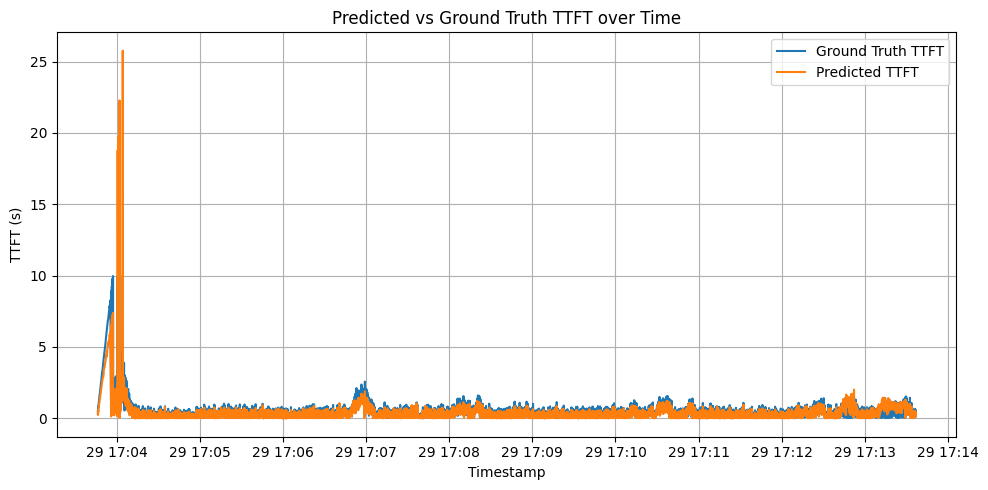

In [5]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(timestamps, gt_ttfts, label="Ground Truth TTFT")
plt.plot(timestamps, pred_ttfts, label="Predicted TTFT")
plt.xlabel("Timestamp")
plt.ylabel("TTFT (s)")
plt.title("Predicted vs Ground Truth TTFT over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

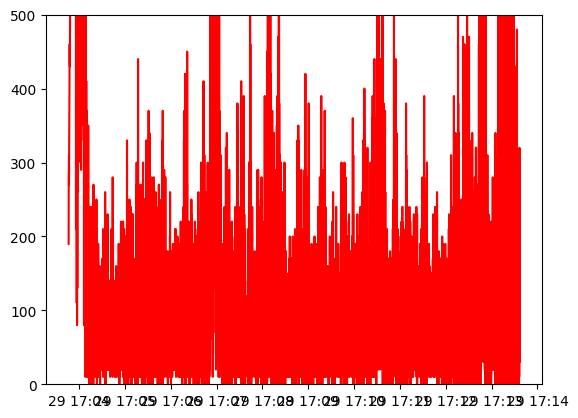

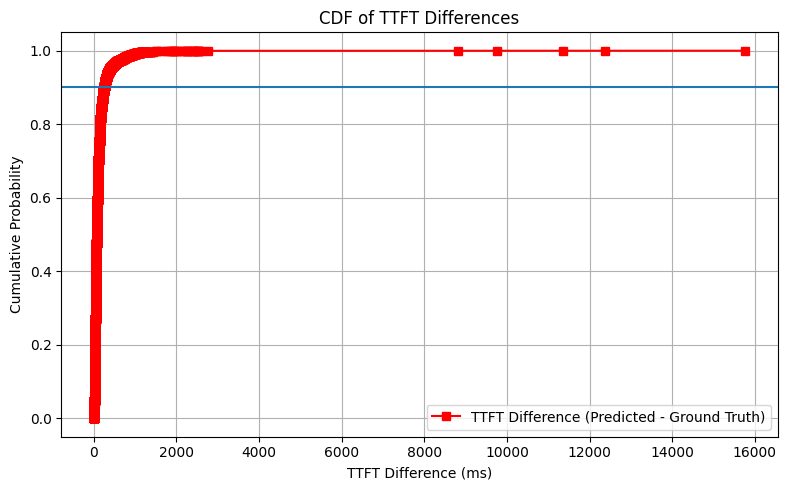

In [4]:
import numpy as np
ttft_diffs = [abs(pred - gt)*1000 for pred, gt in zip(pred_ttfts, gt_ttfts)]
plt.plot(timestamps, ttft_diffs, label="TTFT Difference (Predicted - Ground Truth)", color='red')
plt.ylim(0, 500)
sorted_diffs = np.sort(ttft_diffs)

# Compute the cumulative probability
cdf = np.arange(1, len(sorted_diffs) + 1) / len(sorted_diffs)

# Plot the CDF
plt.figure(figsize=(8, 5))
plt.plot(sorted_diffs, cdf, color='red', marker='s', label='TTFT Difference (Predicted - Ground Truth)')
plt.xlabel("TTFT Difference (ms)")
plt.ylabel("Cumulative Probability")
plt.title("CDF of TTFT Differences")
plt.axhline(y=0.9)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()